<a href="https://colab.research.google.com/github/Juuphaada/Machine-Learning-Study/blob/main/feature_selection%26model_tunning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.0 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [ ]:
!pip install scikeras[tensorflow]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 29.2 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninstalling gast-0.5.4:
      Successfully uninstalled gast-0.5.4
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.2.0
    Uninstalling google-auth-oauthlib-1.2.0:
      Successfully un

#Feature Selection

---------------------------------------------------------

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import numpy as np

In [ ]:
# อ่านข้อมูลจากไฟล์ CSV
#csv_file_path = "/content/drive/MyDrive/ปี 3/วิจัย/งานกลุ่ม/Hipertension Arterial Mexico Data Set/Hipertension_Arterial_Mexico.csv"
csv_file_path = "/content/Hipertension_Arterial_Mexico.csv"
data = pd.read_csv(csv_file_path)

In [ ]:
# ตัด'FOLIO_I'ออก (IDคนไข้ ไม่ใช้ในการ predict)

#X= data[ig_22f]
X = data.drop(['riesgo_hipertension','FOLIO_I'],axis=1).copy()
y = data['riesgo_hipertension']
# แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##feature selection


*   information gain (ใช้อันนี้)
*   Sequential Selection



###information gain (ใช้อันนี้)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
mnb = GaussianNB()

feature_names = X.columns
mi = dict()

i_scores = mutual_info_classif(X, y)

for i,j in zip(feature_names,i_scores):
    mi[i]=j

df_i = pd.DataFrame.from_dict(mi,orient='index',columns=['I-Gain'])
df_i.sort_values(by=['I-Gain'],ascending=False,inplace=True)
df_i.head(15)

,I-Gain
masa_corporal,0.318560
peso,0.226940
medida_cintura,0.214187
edad,0.138210
circunferencia_de_la_pantorrilla,0.120366
segundamedicion_estatura,0.117462
segundamedicion_peso,0.116769
distancia_rodilla_talon,0.115652
estatura,0.106029
segundamedicion_cintura,0.105125


In [ ]:
%%time
acc_scores = []
for kk in range(1, X.shape[1]+1):
    FS_trans = SelectKBest(mutual_info_classif, k=kk).fit(X_train, y_train)
    X_tR_new = FS_trans.transform(X_train)
    X_tS_new = FS_trans.transform(X_test)
    hm_NB = mnb.fit(X_tR_new, y_train)
    y_dash = hm_NB.predict(X_tS_new)
    acc = accuracy_score(y_test, y_dash)
    acc_scores.append(acc)

df_i['Accuracy'] = acc_scores
df_i.head(10)

CPU times: user 16.8 s, sys: 0 ns, total: 16.8 s
Wall time: 16.8 s


,I-Gain,Accuracy
masa_corporal,0.322328,0.769759
peso,0.230584,0.766323
medida_cintura,0.209786,0.792669
edad,0.126717,0.788087
segundamedicion_estatura,0.122927,0.768614
circunferencia_de_la_pantorrilla,0.111001,0.766323
segundamedicion_peso,0.110009,0.768614
estatura,0.106296,0.768614
segundamedicion_cintura,0.106138,0.768614
distancia_rodilla_talon,0.105858,0.768614


In [ ]:
df_i.index

Index(['masa_corporal', 'peso', 'medida_cintura', 'edad',
       'segundamedicion_estatura', 'circunferencia_de_la_pantorrilla',
       'segundamedicion_peso', 'estatura', 'segundamedicion_cintura',
       'distancia_rodilla_talon', 'actividad_total', 'tension_arterial',
       'valor_trigliceridos', 'valor_folato', 'valor_acido_urico',
       'valor_transferrina', 'resultado_glucosa_promedio', 'valor_ferritina',
       'valor_colesterol_hdl', 'valor_vitamina_bdoce', 'sueno_horas',
       'valor_insulina', 'valor_albumina', 'valor_creatina', 'sexo',
       'valor_vitamina_d', 'valor_proteinac_reactiva',
       'valor_hemoglobina_glucosilada', 'resultado_glucosa',
       'valor_colesterol_total', 'valor_colesterol_ldl',
       'temperatura_ambiente', 'concentracion_hemoglobina',
       'valor_homocisteina'],
      dtype='object')

In [ ]:
#feature ที่มีคะแนน i-gain  จากสูงสุด(ตัวแรก)ไปต่ำสุด(ตัวท้าย)
ig = ['masa_corporal', 'peso', 'medida_cintura', 'edad',
       'segundamedicion_estatura', 'circunferencia_de_la_pantorrilla',
       'segundamedicion_peso', 'estatura', 'segundamedicion_cintura',
       'distancia_rodilla_talon', 'actividad_total', 'tension_arterial',
       'valor_trigliceridos', 'valor_folato', 'valor_acido_urico',
       'valor_transferrina', 'resultado_glucosa_promedio', 'valor_ferritina',
       'valor_colesterol_hdl', 'valor_vitamina_bdoce', 'sueno_horas',
       'valor_insulina', 'valor_albumina', 'valor_creatina', 'sexo',
       'valor_vitamina_d', 'valor_proteinac_reactiva',
       'valor_hemoglobina_glucosilada', 'resultado_glucosa',
       'valor_colesterol_total', 'valor_colesterol_ldl',
       'temperatura_ambiente', 'concentracion_hemoglobina',
       'valor_homocisteina']

In [ ]:
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# พบว่าหลังเพิ่ม feature ลำดับที่ 22 ไป คะแนนก็ไม่ดีขึ้นและตกลง
# ยกเว้น random forest

knn_score_list = []
svm_score_list = []
rf_score_list = []

for i in range(len(ig)):
  X_xf = X_train[ig[0:i+1]]
  print(f'with {i+1} feature')

  knn_model = KNeighborsClassifier(algorithm='auto', n_neighbors=8, weights = 'distance', p = 1)
  knn_scores = cross_val_score(knn_model, X_xf, y_train, cv=stratified_kfold)


  svm_model = make_pipeline(StandardScaler(), SVC(C = 3, gamma= 'scale', kernel= 'rbf'))
  svm_scores = cross_val_score(svm_model, X_xf, y_train, cv=stratified_kfold)


  rf_model = RandomForestClassifier(bootstrap = False,
                                       max_depth = 20 ,
                                       max_features = 20,
                                       min_samples_leaf = 3,
                                       min_samples_split = 10,
                                       n_estimators=1000,
                                       random_state=42)

  rf_scores = cross_val_score(rf_model, X_xf, y_train, cv=stratified_kfold)

  knn_score_list.append(np.mean(knn_scores))
  svm_score_list.append(np.mean(svm_scores))
  rf_score_list.append(np.mean(rf_scores))

with 1 feature
with 2 feature
with 3 feature
with 4 feature
with 5 feature
with 6 feature
with 7 feature
with 8 feature
with 9 feature
with 10 feature
with 11 feature
with 12 feature
with 13 feature
with 14 feature
with 15 feature
with 16 feature
with 17 feature
with 18 feature
with 19 feature
with 20 feature
with 21 feature
with 22 feature
with 23 feature
with 24 feature
with 25 feature
with 26 feature
with 27 feature
with 28 feature
with 29 feature
with 30 feature
with 31 feature
with 32 feature
with 33 feature
with 34 feature


In [ ]:
knn_score_list

[0.8722063037249284,
 0.8790830945558741,
 0.8507163323782235,
 0.8595988538681949,
 0.846704871060172,
 0.8541547277936964,
 0.854727793696275,
 0.8670487106017191,
 0.8693409742120345,
 0.8702005730659026,
 0.8902578796561604,
 0.8925501432664756,
 0.8911174785100286,
 0.8916905444126074,
 0.8922636103151863,
 0.8925501432664756,
 0.89054441260745,
 0.8896848137535818,
 0.8902578796561607,
 0.8873925501432665,
 0.8868194842406878,
 0.8871060171919771,
 0.8873925501432665,
 0.8873925501432665,
 0.8873925501432665,
 0.8865329512893982,
 0.8865329512893982,
 0.8865329512893982,
 0.8859598853868196,
 0.8876790830945559,
 0.8899713467048711,
 0.8896848137535815,
 0.8899713467048709,
 0.8899713467048709]

In [ ]:
knn_score_list = [0.8722063037249284,
 0.8790830945558741,
 0.8507163323782235,
 0.8595988538681949,
 0.846704871060172,
 0.8541547277936964,
 0.854727793696275,
 0.8670487106017191,
 0.8693409742120345,
 0.8702005730659026,
 0.8902578796561604,
 0.8925501432664756,
 0.8911174785100286,
 0.8916905444126074,
 0.8922636103151863,
 0.8925501432664756,
 0.89054441260745,
 0.8896848137535818,
 0.8902578796561607,
 0.8873925501432665,
 0.8868194842406878,
 0.8871060171919771,
 0.8873925501432665,
 0.8873925501432665,
 0.8873925501432665,
 0.8865329512893982,
 0.8865329512893982,
 0.8865329512893982,
 0.8859598853868196,
 0.8876790830945559,
 0.8899713467048711,
 0.8896848137535815,
 0.8899713467048709,
 0.8899713467048709]

In [ ]:
svm_score_list

[0.8787965616045845,
 0.873352435530086,
 0.8704871060171919,
 0.8690544412607449,
 0.8684813753581662,
 0.8673352435530086,
 0.866189111747851,
 0.8659025787965616,
 0.8656160458452721,
 0.8653295128939827,
 0.8747851002865328,
 0.873352435530086,
 0.8742120343839541,
 0.871919770773639,
 0.8684813753581662,
 0.8664756446991404,
 0.865329512893983,
 0.8636103151862464,
 0.8593123209169053,
 0.8581661891117479,
 0.8581661891117479,
 0.8578796561604584,
 0.8567335243553009,
 0.8587392550143267,
 0.8593123209169053,
 0.8570200573065904,
 0.8581661891117477,
 0.8558739255014327,
 0.8555873925501434,
 0.859025787965616,
 0.8613180515759312,
 0.8604584527220631,
 0.8616045845272206,
 0.8604584527220631]

In [ ]:
rf_score_list

[0.873352435530086,
 0.857593123209169,
 0.856160458452722,
 0.8495702005730659,
 0.8372492836676217,
 0.8366762177650429,
 0.8349570200573065,
 0.8398280802292264,
 0.8412607449856733,
 0.8343839541547278,
 0.9051575931232092,
 0.9805157593123208,
 0.9822349570200573,
 0.9816618911174786,
 0.9813753581661893,
 0.9810888252148997,
 0.9796561604584527,
 0.9805157593123208,
 0.981375358166189,
 0.9819484240687679,
 0.9810888252148997,
 0.9825214899713467,
 0.984240687679083,
 0.9845272206303726,
 0.9845272206303723,
 0.9848137535816619,
 0.9842406876790832,
 0.9845272206303726,
 0.9845272206303723,
 0.9922636103151863,
 0.9916905444126074,
 0.9916905444126074,
 0.9948424068767908,
 0.9945558739255015]

In [ ]:
ann_score_list = []

for i in range(len(ig)):
  X_xf = X_train[ig[0:i+1]]
  print(f'with {i+1} feature')

  # สร้างและฝึกโมเดล CNN (Convolutional Neural Networks)
  def create_ann_model():
    model = Sequential()
    # เพิ่มเลเยอร์ Convolutional
    # input_dim : 34 จำนวนตาม colum ของ X (จำนวน feature ใน X)
    model.add(Dense(units=10, input_dim=i+1, activation='relu'))

    model.add(Dense(units=2, activation='softmax'))  # 3 คลาสใน output layer

    # คอมไพล์โมเดล
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

  ann_model = KerasClassifier(build_fn=create_ann_model, epochs=100, batch_size=10, verbose=0)
  ann_scores = cross_val_score(ann_model, X_xf, y_train, cv=stratified_kfold)

  ann_score_list.append(np.mean(ann_scores))

with 1 feature


<ipython-input-47-853dd84e63cd>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann_model = KerasClassifier(build_fn=create_ann_model, epochs=100, batch_size=10, verbose=0)


with 2 feature


<ipython-input-47-853dd84e63cd>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann_model = KerasClassifier(build_fn=create_ann_model, epochs=100, batch_size=10, verbose=0)


with 3 feature


<ipython-input-47-853dd84e63cd>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann_model = KerasClassifier(build_fn=create_ann_model, epochs=100, batch_size=10, verbose=0)


with 4 feature


<ipython-input-47-853dd84e63cd>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann_model = KerasClassifier(build_fn=create_ann_model, epochs=100, batch_size=10, verbose=0)


with 5 feature


<ipython-input-47-853dd84e63cd>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann_model = KerasClassifier(build_fn=create_ann_model, epochs=100, batch_size=10, verbose=0)


with 6 feature


<ipython-input-47-853dd84e63cd>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann_model = KerasClassifier(build_fn=create_ann_model, epochs=100, batch_size=10, verbose=0)


with 7 feature


<ipython-input-47-853dd84e63cd>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann_model = KerasClassifier(build_fn=create_ann_model, epochs=100, batch_size=10, verbose=0)


with 8 feature


<ipython-input-47-853dd84e63cd>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann_model = KerasClassifier(build_fn=create_ann_model, epochs=100, batch_size=10, verbose=0)


with 9 feature


<ipython-input-47-853dd84e63cd>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann_model = KerasClassifier(build_fn=create_ann_model, epochs=100, batch_size=10, verbose=0)


with 10 feature


<ipython-input-47-853dd84e63cd>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann_model = KerasClassifier(build_fn=create_ann_model, epochs=100, batch_size=10, verbose=0)


with 11 feature


<ipython-input-47-853dd84e63cd>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann_model = KerasClassifier(build_fn=create_ann_model, epochs=100, batch_size=10, verbose=0)


with 12 feature


<ipython-input-47-853dd84e63cd>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann_model = KerasClassifier(build_fn=create_ann_model, epochs=100, batch_size=10, verbose=0)


with 13 feature


<ipython-input-47-853dd84e63cd>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann_model = KerasClassifier(build_fn=create_ann_model, epochs=100, batch_size=10, verbose=0)


with 14 feature


<ipython-input-47-853dd84e63cd>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann_model = KerasClassifier(build_fn=create_ann_model, epochs=100, batch_size=10, verbose=0)


with 15 feature


<ipython-input-47-853dd84e63cd>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann_model = KerasClassifier(build_fn=create_ann_model, epochs=100, batch_size=10, verbose=0)


with 16 feature


<ipython-input-47-853dd84e63cd>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann_model = KerasClassifier(build_fn=create_ann_model, epochs=100, batch_size=10, verbose=0)


with 17 feature


<ipython-input-47-853dd84e63cd>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann_model = KerasClassifier(build_fn=create_ann_model, epochs=100, batch_size=10, verbose=0)


with 18 feature


<ipython-input-47-853dd84e63cd>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann_model = KerasClassifier(build_fn=create_ann_model, epochs=100, batch_size=10, verbose=0)


with 19 feature


<ipython-input-47-853dd84e63cd>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann_model = KerasClassifier(build_fn=create_ann_model, epochs=100, batch_size=10, verbose=0)


with 20 feature


<ipython-input-47-853dd84e63cd>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann_model = KerasClassifier(build_fn=create_ann_model, epochs=100, batch_size=10, verbose=0)


with 21 feature


<ipython-input-47-853dd84e63cd>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann_model = KerasClassifier(build_fn=create_ann_model, epochs=100, batch_size=10, verbose=0)


with 22 feature


<ipython-input-47-853dd84e63cd>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann_model = KerasClassifier(build_fn=create_ann_model, epochs=100, batch_size=10, verbose=0)


with 23 feature


<ipython-input-47-853dd84e63cd>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann_model = KerasClassifier(build_fn=create_ann_model, epochs=100, batch_size=10, verbose=0)


with 24 feature


<ipython-input-47-853dd84e63cd>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann_model = KerasClassifier(build_fn=create_ann_model, epochs=100, batch_size=10, verbose=0)


with 25 feature


<ipython-input-47-853dd84e63cd>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann_model = KerasClassifier(build_fn=create_ann_model, epochs=100, batch_size=10, verbose=0)


with 26 feature


<ipython-input-47-853dd84e63cd>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann_model = KerasClassifier(build_fn=create_ann_model, epochs=100, batch_size=10, verbose=0)


with 27 feature


<ipython-input-47-853dd84e63cd>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann_model = KerasClassifier(build_fn=create_ann_model, epochs=100, batch_size=10, verbose=0)


with 28 feature


<ipython-input-47-853dd84e63cd>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann_model = KerasClassifier(build_fn=create_ann_model, epochs=100, batch_size=10, verbose=0)


with 29 feature


<ipython-input-47-853dd84e63cd>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann_model = KerasClassifier(build_fn=create_ann_model, epochs=100, batch_size=10, verbose=0)


with 30 feature


<ipython-input-47-853dd84e63cd>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann_model = KerasClassifier(build_fn=create_ann_model, epochs=100, batch_size=10, verbose=0)


with 31 feature


<ipython-input-47-853dd84e63cd>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann_model = KerasClassifier(build_fn=create_ann_model, epochs=100, batch_size=10, verbose=0)


with 32 feature


<ipython-input-47-853dd84e63cd>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann_model = KerasClassifier(build_fn=create_ann_model, epochs=100, batch_size=10, verbose=0)


with 33 feature


<ipython-input-47-853dd84e63cd>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann_model = KerasClassifier(build_fn=create_ann_model, epochs=100, batch_size=10, verbose=0)


with 34 feature


<ipython-input-47-853dd84e63cd>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann_model = KerasClassifier(build_fn=create_ann_model, epochs=100, batch_size=10, verbose=0)


In [ ]:
ann_score_list

[array([0.86962754, 0.85816622, 0.83954155, 0.86819482, 0.85816622]),
 array([0.82808024, 0.88825214, 0.87106019, 0.83094555, 0.83667624]),
 array([0.85530084, 0.86676216, 0.85386819, 0.81661892, 0.68767911]),
 array([0.83094555, 0.83524358, 0.84383953, 0.82091689, 0.80659026]),
 array([0.87392551, 0.85530084, 0.88252151, 0.85530084, 0.8381089 ]),
 array([0.85816622, 0.85959888, 0.87822348, 0.84097421, 0.86389685]),
 array([0.85816622, 0.8137536 , 0.87392551, 0.83094555, 0.78939825]),
 array([0.64469916, 0.7879656 , 0.66905445, 0.85100287, 0.8567335 ]),
 array([0.86962754, 0.70916903, 0.8653295 , 0.84813756, 0.84097421]),
 array([0.86246419, 0.86962754, 0.88538682, 0.84240687, 0.7965616 ]),
 array([0.89684814, 0.85816622, 0.89684814, 0.8051576 , 0.8381089 ]),
 array([0.85530084, 0.89684814, 0.8653295 , 0.8896848 , 0.89398283]),
 array([0.8982808 , 0.81948423, 0.88681948, 0.82808024, 0.87822348]),
 array([0.92120343, 0.88108885, 0.88681948, 0.82378221, 0.91547281]),
 array([0.89541548, 

In [ ]:
len(ann_score_list)

34

In [ ]:
ann_score_list2 = []
for i in ann_score_list:
  print(np.mean(i))
  ann_score_list2.append(np.mean(i))

0.85873927
0.8510028719999999
0.8160458440000001
0.8275071620000001
0.86103152
0.860171928
0.8332378259999998
0.7618911159999999
0.8266475679999999
0.8512894039999999
0.8590258000000001
0.880229222
0.8621776459999999
0.8856733560000001
0.890257882
0.8945558799999999
0.8957020159999999
0.880229234
0.889398276
0.8842407
0.85100286
0.864469908
0.87965616
0.853581666
0.861318052
0.863610302
0.8667621719999999
0.859598854
0.863037252
0.870487106
0.864183368
0.865042972
0.8842406839999999
0.890830934


In [ ]:
d = {'knn_scores' : knn_score_list,
    'svm_scores' : svm_score_list,
    'rf_scores' : rf_score_list,
    'ann_score' : ann_score_list2}
i = [i for i in range(1,34+1)]

In [ ]:
score_on_feature_num = pd.DataFrame(data=d, index=i)


In [ ]:
score_on_feature_num

,knn_scores,svm_scores,rf_scores,ann_score
1,0.872206,0.878797,0.873352,0.858739
2,0.879083,0.873352,0.857593,0.851003
3,0.850716,0.870487,0.856160,0.816046
4,0.859599,0.869054,0.849570,0.827507
5,0.846705,0.868481,0.837249,0.861032
6,0.854155,0.867335,0.836676,0.860172
7,0.854728,0.866189,0.834957,0.833238
8,0.867049,0.865903,0.839828,0.761891
9,0.869341,0.865616,0.841261,0.826648
10,0.870201,0.865330,0.834384,0.851289


In [ ]:
score_on_feature_num.index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34],
           dtype='int64')

<Axes: >

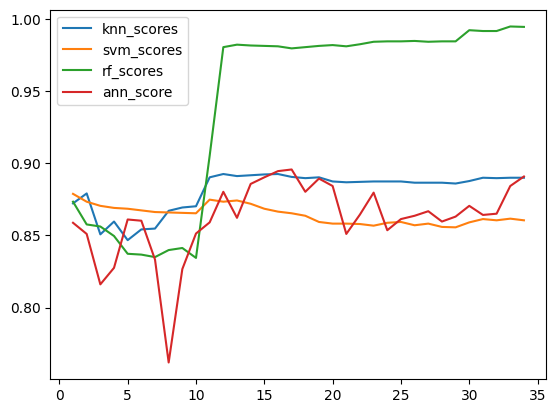

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
score_on_feature_num.plot()

#22 feature แรกที่ได้คะแนนสูงสุด ได้จากทำ i-gain ครั้งก่อน (ต่างกับที่รันไปเมื่อกี้หน่อย)

In [ ]:
# เลือกfeature ได้จากทำ i-gain ครั้งก่อน
ig_22f = ['masa_corporal', 'peso', 'medida_cintura', 'edad',
       'segundamedicion_estatura', 'circunferencia_de_la_pantorrilla',
       'segundamedicion_peso', 'estatura', 'segundamedicion_cintura',
       'distancia_rodilla_talon', 'actividad_total', 'tension_arterial',
       'valor_trigliceridos', 'valor_folato', 'valor_acido_urico',
       'valor_transferrina', 'resultado_glucosa_promedio', 'valor_ferritina',
       'valor_colesterol_hdl', 'valor_vitamina_bdoce', 'sueno_horas',
       'valor_insulina']

In [ ]:
# เอามาแค่ 22 feature ที่ได้คะแนน i-gain สูงสุด
X = data[ig_22f]
y = data['riesgo_hipertension']
# แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##หาการตั้งค่าโมเดลที่ดีที่สุด (model tunning)
feature selection มีผลต่อการตั้งค่าโมเดล

In [ ]:
# Define the hyperparameter grid
svm_param_grid = {'C': [0.1,0.5,1,10,50,100,150], 'gamma': ['scale','auto',0.1,0.01,0.001,0.0001],'kernel': ['rbf']}

rf_param_grid = {
   'bootstrap': [True,False],
   'max_depth': [22,50,75,None],
   'max_features': [2, 3 , 4],
   'min_samples_leaf': [3, 4, 5],
   'min_samples_split': [8, 10, 12],
   'n_estimators': [100, 200, 300, 1000]
}

knn_param_grid = {'n_neighbors': np.arange(1, 11),
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
knn_grid_22f = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=stratified_kfold, scoring='accuracy',verbose = 5)
knn_grid_22f.fit(X, y)
#{'algorithm': 'auto', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
#0.8835679456056832

In [ ]:
# ค่าที่ดีที่สุดสำหรับโมเดล knn
print(knn_grid_22f.best_params_)
print(knn_grid_22f.best_score_ )

In [ ]:
svm_grid_22f = GridSearchCV(SVC(), svm_param_grid, cv=stratified_kfold, scoring='accuracy',verbose = 5)
svm_grid_22f.fit(X,y)
'''
 {'C': 150, 'gamma': 1e-05, 'kernel': 'rbf'}
 0.9037338293556963
'''

In [ ]:
# ค่าที่ดีที่สุดสำหรับโมเดล svm
print(svm_grid_22f.best_params_)
print(svm_grid_22f.best_score_ )

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.9002960896203117


In [ ]:
rf_grid_22f = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=stratified_kfold, scoring='accuracy',verbose = 5)
rf_grid_22f.fit(X[], y)
#{'bootstrap': True, 'max_depth': 22, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 100}
#0.9869363262818289

In [ ]:
# ค่าที่ดีที่สุดสำหรับโมเดล random forest
print(rf_grid_22f.best_params_)
print(rf_grid_22f.best_score_ )

In [ ]:
len(X.columns)

34

In [ ]:
cnn_grid_22f = GridSearchCV(cnn_model,cnn_parem_grid , cv=stratified_kfold , scoring='accuracy',verbose = 5)
#{'batch_size': 10, 'epochs': 100, 'opti': 'adam', 'unit': 11}
#0.8993831247307081
cnn_grid_22f.fit(X,y)

In [ ]:
# ค่าที่ดีที่สุดสำหรับโมเดล cnn
print(cnn_grid_22f.best_params_)
print(cnn_grid_22f.best_score_)

#Test ใช้ค่าที่ได้จาก model tunning

In [ ]:
# สร้างและฝึกโมเดล Random Forest
rf_model = RandomForestClassifier(bootstrap= True,
                                  max_depth= 22,
                                  max_features= 3,
                                  min_samples_leaf= 3,
                                  min_samples_split=12,
                                  n_estimators=100,
                                  random_state=42)
rf_scores = cross_val_score(rf_model, X, y, cv=stratified_kfold)

In [ ]:
# สร้างและฝึกโมเดล SVM
svm_model = make_pipeline(StandardScaler(), SVC(C= 150, gamma = 0.1, kernel = 'rbf'))
svm_scores = cross_val_score(svm_model, X, y, cv=stratified_kfold)

In [ ]:
# สร้างและฝึกโมเดล K-Nearest Neighbors
knn_model = KNeighborsClassifier(algorithm= 'auto', n_neighbors=10, p= 1, weights='distance')
knn_scores = cross_val_score(knn_model, X, y, cv=stratified_kfold)

In [ ]:
# CNN
def create_cnn_model():
    model = Sequential()
    # เพิ่มเลเยอร์ Convolutional
    # Dense : เดิมเป็น 64 เปลี่ยนเป็น 10 node *กลัวนานเกิน ,
    # input_dim : 34 จำนวนตาม colum ของ X (จำนวน feature ใน X)
    model.add(Dense(units=11, input_dim=22, activation='relu'))

    # Dense เคยตั้งเป็น5แล้ว cross_val ออกมาได้แค่ 0.8 กว่าๆ
    model.add(Dense(units=3, activation='softmax'))  # 3 คลาสใน output layer

    # คอมไพล์โมเดล
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

cnn_model = KerasClassifier(build_fn=create_cnn_model, epochs=100, batch_size=10, verbose=0)
cnn_scores = cross_val_score(cnn_model, X.values, y.values, cv=stratified_kfold)

#ค่า accuracy ที่ได้หลังทำ feature selection และ model tunning

In [ ]:
print(f'SVM Cross-Validation Scores: {np.mean(svm_scores)}')
print(f'Random Forest Cross-Validation Scores: {np.mean(rf_scores)}')
print(f'K-Nearest Neighbors Cross-Validation Scores: {np.mean(knn_scores)}')
print(f'CNN Cross-Validation Scores: {np.mean(cnn_scores)}')

SVM Cross-Validation Scores: 0.8828796094874786
Random Forest Cross-Validation Scores: 0.9867048666939899
K-Nearest Neighbors Cross-Validation Scores: 0.8835679456056832


In [ ]:
print(f'CNN Cross-Validation Scores: {np.mean(cnn_scores)}')

<ipython-input-97-3ef8c47bd0a7>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  cnn_model = KerasClassifier(build_fn=create_cnn_model, epochs=100, batch_size=10, verbose=0)


CNN Cross-Validation Scores: 0.8922746181488037


##Sequential Selection (ไม่ใช้)

In [ ]:
# feature selection
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs_forward = SFS(knn,
                  k_features=20,
                  forward=False,
                  floating=False,
                  verbose=2,
                  scoring='accuracy',
                  cv=2, n_jobs = -1)

sfs_forward = sfs_forward.fit(X_train, y_train)

In [ ]:
rf_sfs_forward = SFS(rf,
                  k_features=22,
                  forward=False,
                  floating=False,
                  verbose=2,
                  scoring='accuracy',
                  cv=2, n_jobs = -1)

rf_sfs_forward = rf_sfs_forward.fit(X_train, y_train)

In [ ]:
svm_sfs_forward = SFS(svm,
                  k_features=22,
                  forward=False,
                  floating=False,
                  verbose=2,
                  scoring='accuracy',
                  cv=2, n_jobs = -1)

svm_sfs_forward = svm_sfs_forward.fit(X_train, y_train)

In [ ]:
print(sfs_forward.k_feature_names_)
print(sfs_forward.k_feature_idx_)

('sexo', 'concentracion_hemoglobina', 'temperatura_ambiente', 'valor_acido_urico', 'valor_albumina', 'valor_colesterol_ldl', 'valor_colesterol_total', 'valor_creatina', 'resultado_glucosa', 'valor_insulina', 'valor_hemoglobina_glucosilada', 'valor_folato', 'valor_homocisteina', 'valor_vitamina_d', 'peso', 'estatura', 'segundamedicion_peso', 'segundamedicion_estatura', 'distancia_rodilla_talon', 'tension_arterial', 'sueno_horas', 'masa_corporal')
(0, 2, 3, 4, 5, 7, 8, 9, 10, 11, 14, 16, 17, 21, 22, 23, 25, 26, 27, 30, 31, 32)


In [ ]:
print(rf_sfs_forward.k_feature_names_)
print(rf_sfs_forward.k_feature_idx_)

('edad', 'concentracion_hemoglobina', 'temperatura_ambiente', 'valor_acido_urico', 'valor_colesterol_hdl', 'valor_colesterol_total', 'valor_creatina', 'valor_insulina', 'valor_trigliceridos', 'resultado_glucosa_promedio', 'valor_hemoglobina_glucosilada', 'valor_proteinac_reactiva', 'valor_transferrina', 'valor_vitamina_d', 'medida_cintura', 'segundamedicion_peso', 'segundamedicion_estatura', 'distancia_rodilla_talon', 'segundamedicion_cintura', 'tension_arterial', 'masa_corporal', 'actividad_total')
(1, 2, 3, 4, 6, 8, 9, 11, 12, 13, 14, 18, 19, 21, 24, 25, 26, 27, 29, 30, 32, 33)


In [ ]:
print(svm_sfs_forward.k_feature_names_)
print(svm_sfs_forward.k_feature_idx_)

('sexo', 'edad', 'concentracion_hemoglobina', 'temperatura_ambiente', 'valor_acido_urico', 'valor_albumina', 'valor_colesterol_hdl', 'valor_colesterol_ldl', 'valor_colesterol_total', 'valor_creatina', 'resultado_glucosa', 'valor_insulina', 'resultado_glucosa_promedio', 'valor_hemoglobina_glucosilada', 'valor_folato', 'valor_homocisteina', 'valor_proteinac_reactiva', 'estatura', 'medida_cintura', 'segundamedicion_peso', 'circunferencia_de_la_pantorrilla', 'actividad_total')
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18, 23, 24, 25, 28, 33)


In [ ]:
1 in list(svm_sfs_forward.k_feature_idx_)

True

ผล feature selection แตกต่างตามโมเดลที่ใช้

In [ ]:
svm_no = []
rf_no = []
for i in sfs_forward.k_feature_idx_:
  if i not in svm_sfs_forward.k_feature_idx_:
    svm_no.append(i)
  if i not in rf_sfs_forward.k_feature_idx_:
    rf_no.append(i)
print(f'svm no {svm_no}')
print(f'rf no {rf_no}')
#กับknn  svmและrf ขาดตัวไหนบ้าง

svm no [21, 22, 26, 27, 30, 31, 32]
rf no [0, 5, 7, 10, 16, 17, 22, 23, 31]


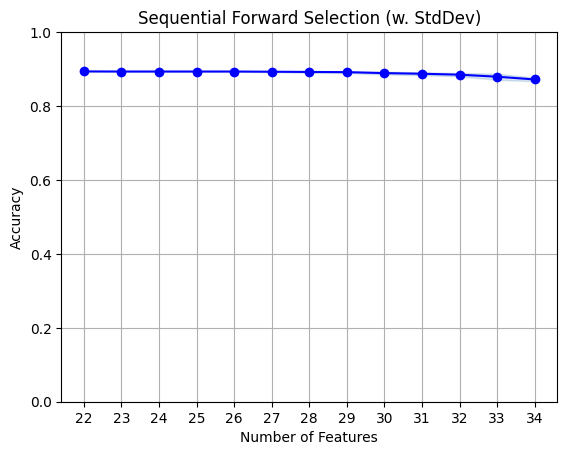

('sexo', 'temperatura_ambiente', 'valor_acido_urico', 'valor_albumina', 'valor_colesterol_ldl', 'valor_colesterol_total', 'valor_creatina', 'resultado_glucosa', 'valor_insulina', 'valor_trigliceridos', 'resultado_glucosa_promedio', 'valor_hemoglobina_glucosilada', 'valor_folato', 'peso', 'estatura', 'medida_cintura', 'segundamedicion_peso', 'segundamedicion_estatura', 'segundamedicion_cintura', 'tension_arterial', 'masa_corporal', 'actividad_total')
(0, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 16, 22, 23, 24, 25, 26, 29, 30, 32, 33)


In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(sfs_forward.get_metric_dict(),
                ylabel='Accuracy',
                kind='std_dev')
fig1 = plot_sfs(sfs_forward.get_metric_dict(),
                ylabel='Accuracy',
                kind='std_dev')
fig1 = plot_sfs(sfs_forward.get_metric_dict(),
                ylabel='Accuracy',
                kind='std_dev')

plt.ylim([0, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()